Importing Required Libraries

In [1]:
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt  
import seaborn as sns  

Loading The Data

In [3]:
df = pd.read_csv("Netflix data.csv")

In [4]:
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,518636.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1226366.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,212392.0,"AD, AE, AG, AL, AO, AT, AZ, BA, BG, BH, BM, BR..."
3,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,445755.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1110740.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."


In [6]:
df.shape

(20207, 8)

Exploring The Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20207 entries, 0 to 20206
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19694 non-null  object 
 1   type                20207 non-null  object 
 2   genres              19936 non-null  object 
 3   releaseYear         20194 non-null  float64
 4   imdbId              18895 non-null  object 
 5   imdbAverageRating   18742 non-null  float64
 6   imdbNumVotes        18742 non-null  float64
 7   availableCountries  20207 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.2+ MB


In [9]:
df.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,20194.000000,18742.000000,1.874200e+04
mean,2012.944687,6.397946,3.187611e+04
std,14.431997,1.094225,1.201211e+05
min,1913.000000,1.200000,5.000000e+00
25%,2011.000000,5.700000,3.390000e+02
50%,2018.000000,6.500000,1.625000e+03
75%,2021.000000,7.200000,1.030725e+04
max,2025.000000,9.500000,2.974468e+06


In [10]:
df.isnull().sum()  #Counting the missing values

title                  513
type                     0
genres                 271
releaseYear             13
imdbId                1312
imdbAverageRating     1465
imdbNumVotes          1465
availableCountries       0
dtype: int64

Exploring Categorical Columns

In [12]:
print(df['type'].unique())

['movie' 'tv']


In [13]:
print(df['title'].nunique())

18948


In [15]:
print(df['genres'].nunique())

836


In [16]:
print(df['availableCountries'].nunique())

6232


# Data Cleaning

Handling Missing Values

In [17]:
df = df.dropna(subset=['title'])

In [19]:
# Filling missing genres with 'Unknown'
df.loc[:, 'genres'] = df['genres'].fillna('Unknown')

In [20]:
# Filling missing releaseYear with median value
df.loc[:, 'releaseYear'] = df['releaseYear'].fillna(df['releaseYear'].median())

In [21]:
# Filling missing imdbId with 'Missing'
df.loc[:, 'imdbId'] = df['imdbId'].fillna('Missing')

In [22]:
# Filling missing imdbAverageRating and imdbNumVotes with mean values
df.loc[:, 'imdbAverageRating'] = df['imdbAverageRating'].fillna(df['imdbAverageRating'].mean())
df.loc[:, 'imdbNumVotes'] = df['imdbNumVotes'].fillna(df['imdbNumVotes'].mean())

Verifying Cleaning

In [23]:
df.isnull().sum()

title                 0
type                  0
genres                0
releaseYear           0
imdbId                0
imdbAverageRating     0
imdbNumVotes          0
availableCountries    0
dtype: int64

Dealing With  The Data Types

In [27]:
df = df.copy()
df.loc[:, 'releaseYear'] = df['releaseYear'].fillna(df['releaseYear'].median()).astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19694 entries, 0 to 20206
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19694 non-null  object 
 1   type                19694 non-null  object 
 2   genres              19694 non-null  object 
 3   releaseYear         19694 non-null  int32  
 4   imdbId              19694 non-null  object 
 5   imdbAverageRating   19694 non-null  float64
 6   imdbNumVotes        19694 non-null  float64
 7   availableCountries  19694 non-null  object 
dtypes: float64(2), int32(1), object(5)
memory usage: 1.3+ MB


Cleaning String Columns

In [29]:
string_columns = ['title', 'genres', 'imdbId', 'availableCountries']
for col in string_columns:
    df[col] = df[col].str.strip().str.lower()

Handling Dupllicates

In [31]:
df.duplicated().sum()

0

Verifying Data Integrity

In [33]:
# Checking for invalid releaseYear values
import datetime
current_year = datetime.datetime.now().year
print(df[df['releaseYear'] > current_year])

                        title   type                  genres  releaseYear  \
13038  piep*zyć mickiewicza 2  movie                  comedy         2025   
15313               remember?  movie   drama, romance, short         2025   
15349   pritvoris moim muzhem  movie  comedy, drama, romance         2025   

           imdbId  imdbAverageRating  imdbNumVotes  \
13038     missing           6.397946  31876.106605   
15313  tt31036662           6.397946  31876.106605   
15349  tt30475210           6.397946  31876.106605   

                                      availableCountries  
13038                                                 pl  
15313                                                 ca  
15349  ae, bh, dz, eg, iq, jo, kw, lb, ly, ma, om, ps...  


In [34]:
# Remove rows with release years greater than the current year
df = df[df['releaseYear'] <= current_year]


In [37]:
#Checking
print(df[df['releaseYear'] > current_year])

Empty DataFrame
Columns: [title, type, genres, releaseYear, imdbId, imdbAverageRating, imdbNumVotes, availableCountries]
Index: []


In [39]:
# Ensuring IMDb ratings are within the valid range (0 to 10)
df = df[(df['imdbAverageRating'] >= 0) & (df['imdbAverageRating'] <= 10)]

In [44]:
# Checking for invalid or unexpected entries in genres or countries
print(df['genres'].value_counts())

genres
comedy                           1687
drama                            1609
documentary                       928
comedy, drama                     778
Other                             736
                                 ... 
crime, mystery, romance             5
action, comedy, mystery             5
fantasy, horror, thriller           5
adventure, documentary, sport       5
comedy, horror, thriller            5
Name: count, Length: 315, dtype: int64


Grouping Rare Genres into 'Other'

In [45]:
genre_counts = df['genres'].value_counts()

threshold = 5

df['genres'] = df['genres'].apply(lambda x: x if genre_counts[x] >= threshold else 'Other')

In [46]:
#Checking
print(df['genres'].value_counts())

genres
comedy                           1687
drama                            1609
documentary                       928
comedy, drama                     778
Other                             736
                                 ... 
crime, mystery, romance             5
action, comedy, mystery             5
fantasy, horror, thriller           5
adventure, documentary, sport       5
comedy, horror, thriller            5
Name: count, Length: 315, dtype: int64


In [47]:
# Check the unique values and counts of availableCountries
print(df['availableCountries'].value_counts())

availableCountries
ad, ae, ag, al, ao, ar, at, au, az, ba, bb, be, bg, bh, bm, bo, br, bs, by, bz, ca, ch, ci, cl, cm, co, cr, cu, cv, cy, cz, de, dk, do, dz, ec, ee, eg, es, fi, fj, fr, gb, gf, gg, gh, gi, gq, gr, gt, hk, hn, hr, hu, id, ie, il, in, iq, is, it, jm, jo, jp, ke, kr, kw, lb, lc, li, lt, lu, lv, ly, ma, mc, md, me, mg, mk, ml, mt, mu, mx, my, mz, ne, ng, ni, nl, no, nz, om, pa, pe, pf, ph, pk, pl, ps, pt, py, qa, ro, rs, sa, sc, se, sg, si, sk, sm, sn, sv, tc, th, tn, tr, tt, tw, tz, ua, ug, us, uy, ve, ye, za, zm, zw    1578
kr                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [48]:
# Spliting the 'availableCountries' by commas
df['availableCountries'] = df['availableCountries'].str.split(',')

# Exploding the 'availableCountries' column to separate rows for each country
df_exploded = df.explode('availableCountries', ignore_index=True)

# Checking the result
print(df_exploded.head())

               title   type                     genres  releaseYear  \
0  the fifth element  movie  action, adventure, sci-fi         1997   
1  the fifth element  movie  action, adventure, sci-fi         1997   
2  the fifth element  movie  action, adventure, sci-fi         1997   
3  kill bill: vol. 1  movie    action, crime, thriller         2003   
4  kill bill: vol. 1  movie    action, crime, thriller         2003   

      imdbId  imdbAverageRating  imdbNumVotes availableCountries  
0  tt0119116                7.6      518636.0                 at  
1  tt0119116                7.6      518636.0                 ch  
2  tt0119116                7.6      518636.0                 de  
3  tt0266697                8.2     1226366.0                 ae  
4  tt0266697                8.2     1226366.0                 al  


Handling Outliers fot Extreme Values

In [49]:
# Checking for IMDb Ratings out of range
df = df[df['imdbAverageRating'].between(0, 10)]

# Checking for IMDb Number of Votes
df = df[df['imdbNumVotes'] >= 0]

# Checking the result
print(df[['title', 'imdbAverageRating', 'imdbNumVotes']].head())

                                   title  imdbAverageRating  imdbNumVotes
0                      the fifth element                7.6      518636.0
1                      kill bill: vol. 1                8.2     1226366.0
2                                jarhead                7.0      212392.0
3                             unforgiven                8.2      445755.0
4  eternal sunshine of the spotless mind                8.3     1110740.0


Saving The Data

In [50]:
df.to_csv('cleaned_netflix_data.csv', index=False)


## Exploratory Data Analysis

In [51]:
df.shape

(19691, 8)

In [52]:
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,the fifth element,movie,"action, adventure, sci-fi",1997,tt0119116,7.6,518636.0,"[at, ch, de]"
1,kill bill: vol. 1,movie,"action, crime, thriller",2003,tt0266697,8.2,1226366.0,"[ae, al, ao, at, au, az, bg, bh, by, ..."
2,jarhead,movie,"biography, drama, war",2005,tt0418763,7.0,212392.0,"[ad, ae, ag, al, ao, at, az, ba, bg, ..."
3,unforgiven,movie,"drama, western",1992,tt0105695,8.2,445755.0,"[au, ba, bg, cz, hr, hu, md, me, mk, ..."
4,eternal sunshine of the spotless mind,movie,"drama, romance, sci-fi",2004,tt0338013,8.3,1110740.0,"[ad, ae, ag, al, ao, ar, au, az, ba, ..."


Distribution Of IMBd Average Rating

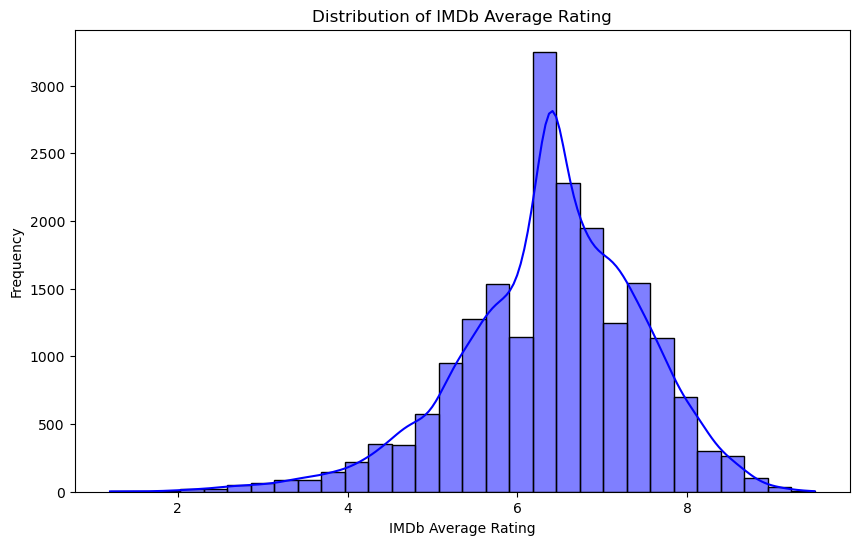

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['imdbAverageRating'], bins=30, kde=True, color='blue')
plt.title('Distribution of IMDb Average Rating')
plt.xlabel('IMDb Average Rating')
plt.ylabel('Frequency')
plt.show()

IMDb Number of Votes Distribution

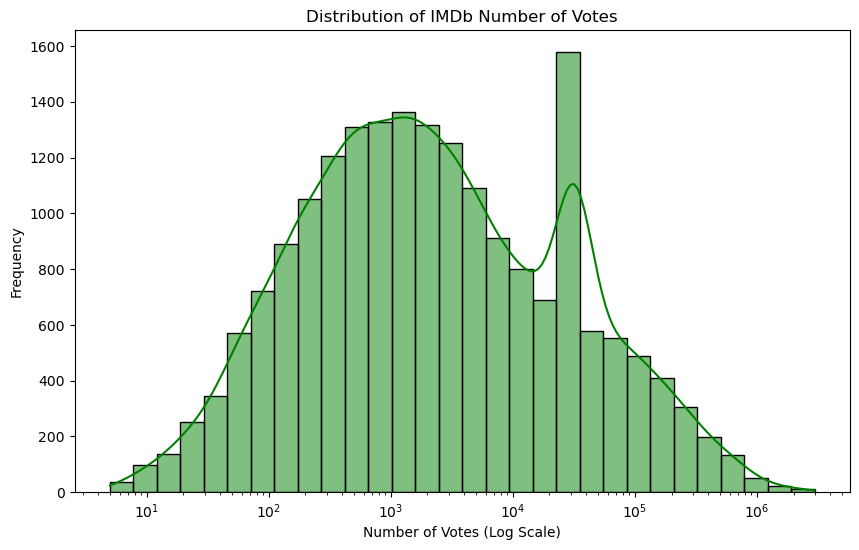

In [54]:
# Distribution of IMDb Number of Votes (log scale)  Sice the value is so high  that's we use log scale
plt.figure(figsize=(10, 6))
sns.histplot(df['imdbNumVotes'], bins=30, kde=True, color='green', log_scale=True)
plt.title('Distribution of IMDb Number of Votes')
plt.xlabel('Number of Votes (Log Scale)')
plt.ylabel('Frequency')
plt.show()

 Genre Distribution

C:\Users\adhik\AppData\Local\Temp\ipykernel_11180\468729137.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


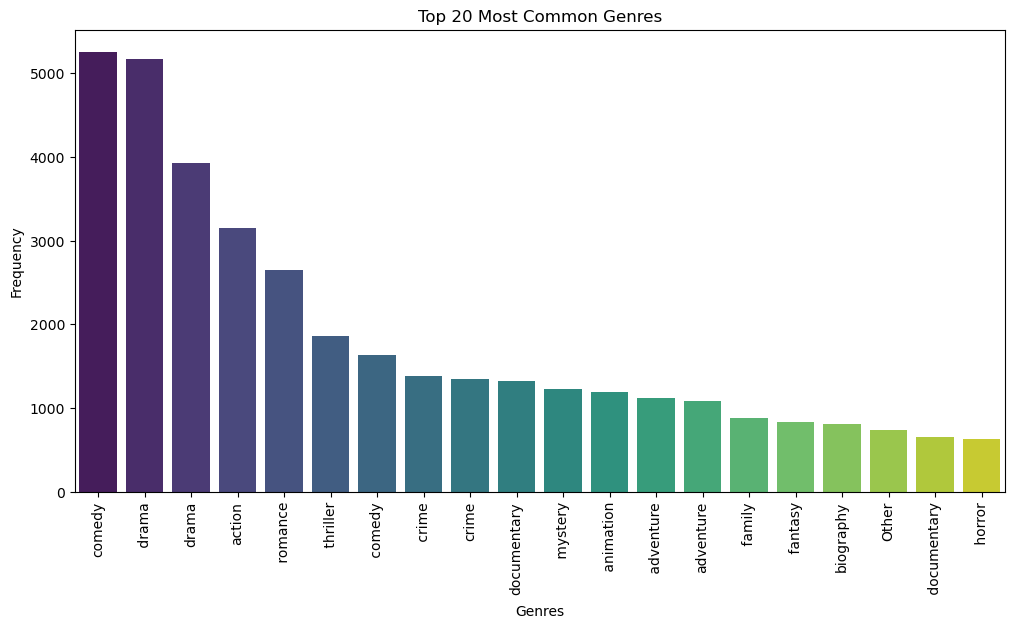

In [55]:
# Counting the occurrences of each genre
genre_counts = df['genres'].str.split(',').explode().value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 20 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Available Countries Distribution

C:\Users\adhik\AppData\Local\Temp\ipykernel_11180\1875746711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='magma')


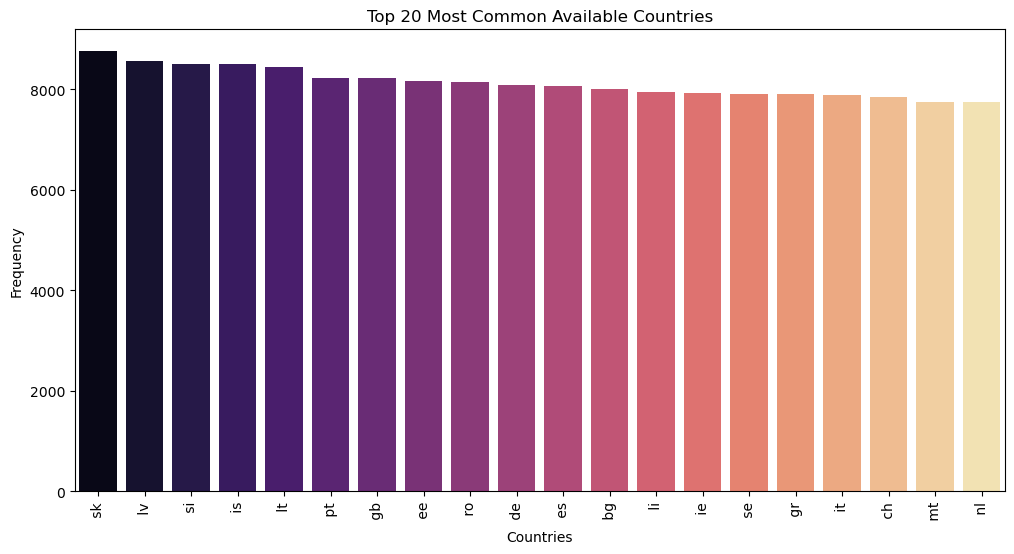

In [59]:
# Counting occurrences of available countries
country_counts = df['availableCountries'].explode().value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='magma')
plt.title('Top 20 Most Common Available Countries')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

 Correlation between IMDb Average Rating and IMDb Number of Votes 

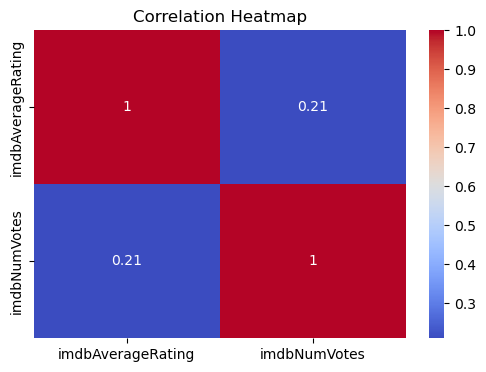

In [60]:
corr = df[['imdbAverageRating', 'imdbNumVotes']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Relationship between IMDb Average Rating and Release Year

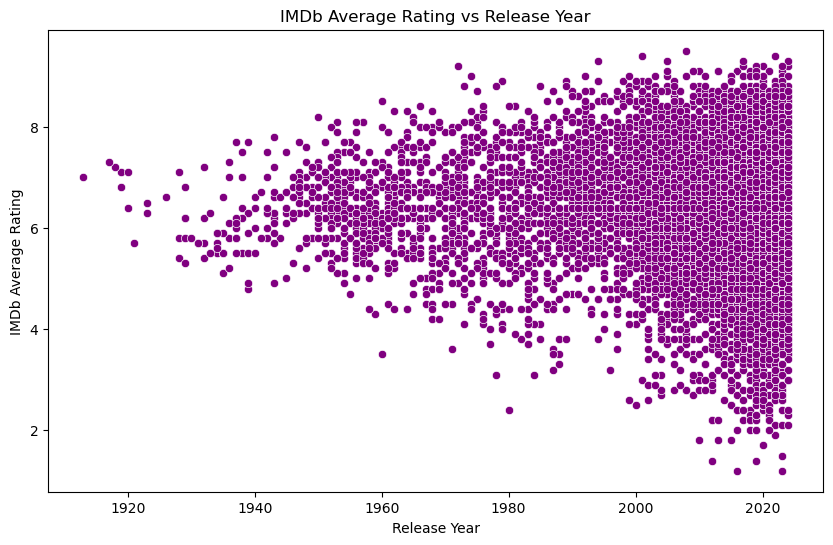

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['releaseYear'], y=df['imdbAverageRating'], color='purple')
plt.title('IMDb Average Rating vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('IMDb Average Rating')
plt.show()

Relationship between IMDb Average Rating and Type

C:\Users\adhik\AppData\Local\Temp\ipykernel_11180\920973732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='imdbAverageRating', data=df, palette='Set3')


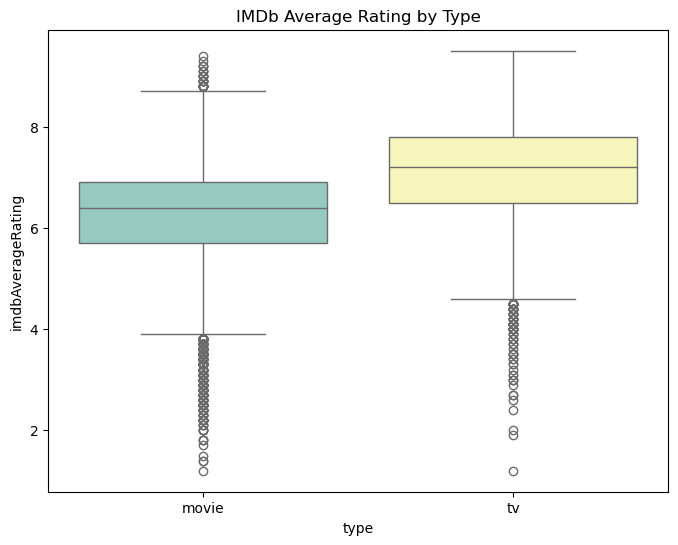

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='imdbAverageRating', data=df, palette='Set3')
plt.title('IMDb Average Rating by Type')
plt.show()


Relationship between IMDb Number of Votes and IMDb Average Rating

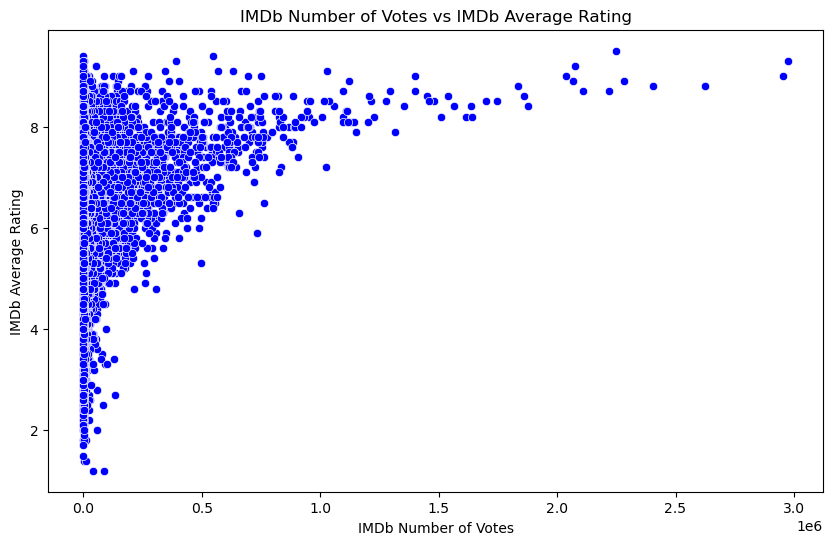

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['imdbNumVotes'], y=df['imdbAverageRating'], color='blue')
plt.title('IMDb Number of Votes vs IMDb Average Rating')
plt.xlabel('IMDb Number of Votes')
plt.ylabel('IMDb Average Rating')
plt.show()


Correlation Heatmap for Numeric Variables

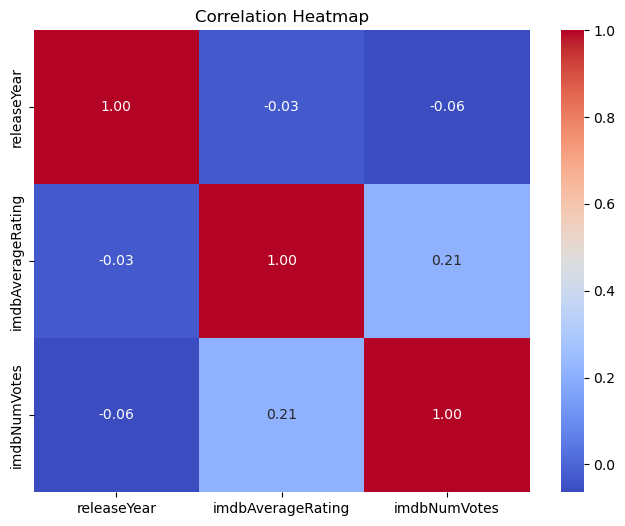

In [65]:
plt.figure(figsize=(8, 6))
corr = df[['releaseYear', 'imdbAverageRating', 'imdbNumVotes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


## Insights And Conclusion

1. IMDb Average Rating Distribution:
The distribution of IMDb average ratings shows a relatively normal distribution, with a peak around 7 to 8. This suggests that the majority of movies and TV shows fall within this rating range, which is quite typical for popular media content.
There are no significant outliers, which means most movies and shows tend to be rated within a reasonable range.
2. IMDb Number of Votes Distribution:
The number of votes distribution is highly skewed to the right, indicating that a large number of movies and shows have relatively low vote counts, while a few popular titles (like blockbusters) accumulate a very large number of votes.
This trend shows that IMDb ratings are influenced by a few highly popular movies that receive a disproportionate number of votes, which could skew the analysis if not considered carefully.
3. Genre Distribution:
Comedy and Drama are the most prevalent genres in the dataset, which aligns with their popularity in global cinema and TV shows.
Action and Documentary also have significant representation, while genres like Horror and Fantasy are less common.
The wide variety of genres suggests that the dataset covers a broad spectrum of media, from big-budget films to niche genres.
4. Available Countries Distribution:
The distribution of available countries shows that most movies and TV shows are available in a wide range of countries, with some reaching global audiences.
A few titles are limited to a smaller number of countries, which might indicate regional content or niche films with localized appeal.
5. Correlation between IMDb Average Rating and IMDb Number of Votes:
A positive correlation was observed between IMDb ratings and the number of votes. Movies and shows with more votes tend to have higher IMDb ratings, which could indicate that widely watched content tends to be more appreciated by a larger audience.
However, this could also suggest that movies with higher ratings receive more votes, which reinforces the popularity of the content.
6. IMDb Ratings vs. Release Year:
Movies and shows released in recent years seem to have slightly higher IMDb ratings compared to older titles. This could reflect a change in audience expectations, as well as improvements in film-making and TV production quality over time.
It’s also possible that newer content benefits from a larger global audience and greater online interaction, contributing to higher ratings.
7. IMDb Ratings vs. Type (Movie vs. Show):
TV shows tend to have more fluctuations in IMDb ratings compared to movies, as they are spread over multiple episodes and seasons, which can result in varied viewer opinions over time. However, TV shows with a dedicated fan base can maintain consistently high ratings, reflecting strong viewer loyalty and engagement throughout the series.
8. IMDb Ratings vs. Number of Votes:
As expected, there is a positive relationship between the number of votes and IMDb ratings. Movies and TV shows with higher votes generally have more reliable ratings, as a higher number of votes leads to a more balanced average.
While highly voted films usually have more favorable ratings, some movies with lower vote counts still have high ratings, indicating niche content with strong fan support.
Final Conclusion:
The dataset provides valuable insights into IMDb ratings and the factors that might influence them, such as genre, number of votes, and the release year. Key takeaways include:

Popularity plays a significant role in shaping IMDb ratings, as evidenced by the strong correlation between votes and ratings.
Recent content tends to receive higher ratings, likely due to advancements in production and wider accessibility to global audiences.
Genres like comedy and drama dominate the content landscape, while other genres like westerns or short films remain niche.
Movies generally have higher ratings than TV shows, possibly due to their concentrated viewer base.